<a href="https://colab.research.google.com/github/rujjal/Handwritten-digit-recognition-deep-learning/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install tensorflow

In [7]:
#importing the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



In [8]:
#loading mnist dataset from keras
mnist = tf.keras.datasets.mnist

In [9]:
#dividing datasets into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


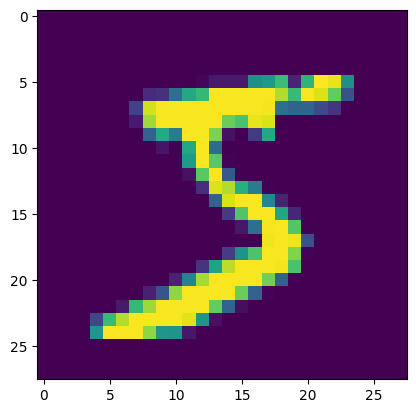

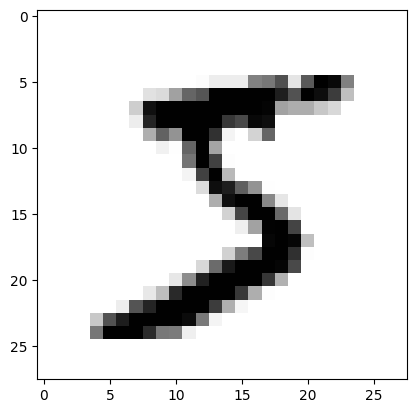

In [13]:
#plotting the graph to check how the data looks

plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap= plt.cm.binary) #changing the configuration
plt.show()

In [14]:
#checking the values of each pixel before normalization
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

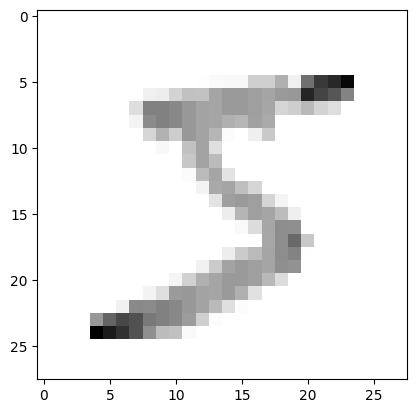

In [15]:
#As images are in grey level (1 channel = 0 to 255) , not colored(RGB)
#Normalizing the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)
#plt.imshow(x_test[0], cmap=plt.cm.binary)


In [16]:
#Values after normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
#checking the labels
print(y_train[0])

5


In [18]:
#Resizing the images to apply the convolution
IMG_SIZE= 28
x_train_resize= np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increasing 1 dimension for kernel(filter) operation
x_test_resize= np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training sample dimesion:", x_train_resize.shape)
print("Testing sample dimesion:", x_test_resize.shape)

Training sample dimesion: (60000, 28, 28, 1)
Testing sample dimesion: (10000, 28, 28, 1)


In [19]:
#Training on 60,000 samples of MNIST handwritten datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [21]:
#Creating a neural network
model = Sequential()

#first convolution layer
model.add(Conv2D(64,(3,3), input_shape= x_train_resize.shape[1:]))
model.add(Activation("relu")) #activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model.add(Flatten()) #need to use flatten before using fully connected layer 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#fully connected layer 3 , output must be equal to number of classes, 10 (0-9)
model.add(Dense(10))
model.add(Activation("softmax")) #activation func is changed to softmax (class probabilities)



In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [23]:
print("Total training samples: ", len(x_train_resize))

Total training samples:  60000


In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [26]:
#training my model
model.fit(x_train_resize,y_train, epochs = 5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 19s 6ms/step - loss: 0.3292 - accuracy: 0.8966 - val_loss: 0.1330 - val_accuracy: 0.9574
Epoch 2/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1008 - accuracy: 0.9691 - val_loss: 0.1146 - val_accuracy: 0.9629
Epoch 3/5
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0723 - accuracy: 0.9770 - val_loss: 0.0937 - val_accuracy: 0.9699
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0568 - accuracy: 0.9820 - val_loss: 0.0662 - val_accuracy: 0.9807
Epoch 5/5
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0703 - val_accuracy: 0.9793


In [28]:
#evaluating on testing datasets
test_loss, test_acc= model.evaluate(x_test_resize,y_test)
print("test loss on 10,000 test samples: ",test_loss)
print("validation accuracy on 10,000 test samples: ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0634 - accuracy: 0.9818
test loss on 10,000 test samples:  0.06342432647943497
validation accuracy on 10,000 test samples:  0.9818000197410583


In [29]:
predictions = model.predict([x_test_resize])
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[2.0313222e-07 1.8898440e-06 1.1254043e-05 ... 9.9998271e-01
  2.2138840e-07 2.3752877e-06]
 [2.3059073e-04 3.0716619e-05 9.9971133e-01 ... 2.0776750e-05
  2.7142812e-07 4.8966049e-06]
 [2.7361301e-07 9.9996293e-01 3.3738299e-05 ... 1.2102238e-06
  1.2896578e-07 2.9050969e-07]
 ...
 [5.1398437e-09 6.8924419e-07 9.6533370e-10 ... 1.5427078e-07
  8.7113921e-07 2.4568415e-06]
 [2.0451267e-05 1.8966160e-08 6.1399511e-08 ... 3.4705188e-08
  1.1923761e-05 3.3394454e-07]
 [2.0778823e-05 3.5056742e-06 1.4375923e-05 ... 1.0693501e-07
  1.7387039e-05 1.6007138e-05]]


In [30]:
print(np.argmax(predictions[0]))

7


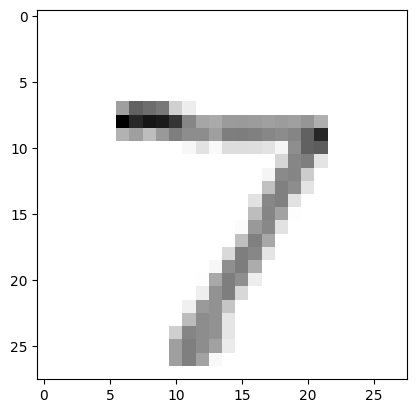

In [34]:
plt.imshow(x_test[0], cmap=plt.cm.binary)